In [224]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import time
import zipfile
import locale

pd.set_option("display.max_columns", 50)
locale.setlocale( locale.LC_ALL, '' )

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [ ]:
# debugging 

# import pdb; pdb.set_trace()
# c means continue
# n means n
# can type in variable names






# LAND VALUE DATA

In [279]:
# checking structure of land value data
zip_path = Path("data/land_value_data/LV_20170701.zip")
zf = zipfile.ZipFile(zip_path)
start_time = time.time()

test_df = pd.read_csv(zf.open("001_LAND_VALUE_DATA_20170701.csv"), dtype=dtype_dict)

elapsed_time = time.time() - start_time
print(elapsed_time)

test_df.sample(100)

0.16342592239379883


,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,PROPERTY DESCRIPTION,ZONE CODE,AREA,AREA TYPE,BASE DATE 1,LAND VALUE 1,AUTHORITY 1,BASIS 1,BASE DATE 2,LAND VALUE 2,AUTHORITY 2,BASIS 2,BASE DATE 3,LAND VALUE 3,AUTHORITY 3,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
9024,1,CESSNOCK,3828,NORMAL,NaN,NaN,60,RUBY ST,BELLBIRD,2325.0,8/D/7856,R2,853.600,M,01/07/2016,133000.0,14A(1),6A(1),01/07/2015,128000.0,14A(1),6A(1),01/07/2014,122000.0,14A(1),6A(1),01/07/2013,116000.0,14A(1),6A(1),01/07/2012,114000.0,14A(1),6A(1),NaN
16194,1,CESSNOCK,15787,NORMAL,NaN,NaN,12,TEECE ST,WESTON,2326.0,34/264038,R2,570.700,M,01/07/2016,99200.0,14A(1),6A(1),01/07/2015,93800.0,14A(1),6A(1),01/07/2014,90700.0,14A(1),6A(1),01/07/2013,86100.0,14A(1),6A(1),01/07/2012,82000.0,14A(1),6A(1),NaN
14233,1,CESSNOCK,9980,NORMAL,NaN,NaN,74,BOWDEN ST,HEDDON GRETA,2321.0,22/9/3816,R2,809.400,M,01/07/2016,172000.0,14A(1),6A(1),01/07/2015,166000.0,14A(1),6A(1),01/07/2014,158000.0,14A(1),6A(1),01/07/2013,158000.0,14A(1),6A(1),01/07/2012,150000.0,14A(1),6A(1),NaN
2145,1,CESSNOCK,4127,NORMAL,NaN,NaN,369,WOLLOMBI RD,BELLBIRD,2325.0,30/7802,R2,657.600,M,01/07/2016,115000.0,14A(1),6A(1),01/07/2015,109000.0,14A(1),6A(1),01/07/2014,98700.0,14A(1),6A(1),01/07/2013,94000.0,14A(1),6A(1),01/07/2012,92200.0,14A(1),6A(1),NaN
2420,1,CESSNOCK,6495,NORMAL,NaN,NaN,8,DUDLEY ST,CESSNOCK,2325.0,4/7/6102,R3,669.050,M,01/07/2016,167000.0,14A(1),6A(1),01/07/2015,162000.0,14A(1),6A(1),01/07/2014,157000.0,14A(1),6A(1),01/07/2013,152000.0,14A(1),6A(1),01/07/2012,145000.0,14A(1),6A(1),NaN
1908,1,CESSNOCK,8850,NORMAL,NaN,NaN,11,WILLIAM ST,CESSNOCK,2325.0,"22, 23/H/4927",R3,1226.000,M,01/07/2016,185000.0,14A(1),6A(1),01/07/2015,180000.0,14A(1),6A(1),01/07/2014,175000.0,14A(1),6A(1),01/07/2013,170000.0,14A(1),6A(1),01/07/2012,170000.0,14A(1),6A(1),NaN
9408,1,CESSNOCK,8388,NORMAL,NaN,NaN,1,SERGEANT ST,CESSNOCK,2325.0,D/307014,R3,677.800,M,01/07/2016,136000.0,14A(1),6A(1),01/07/2015,132000.0,14A(1),6A(1),01/07/2014,128000.0,14A(1),6A(1),01/07/2013,124000.0,14A(1),6A(1),01/07/2012,118000.0,14A(1),6A(1),NaN
150,1,CESSNOCK,2884415,NORMAL,NaN,NaN,39,DUNLOP DR,PAXTON,2325.0,8/1034264,R5,2.018,H,01/07/2016,291000.0,14A(1),6A(1),01/07/2015,281000.0,14A(1),6A(1),01/07/2014,275000.0,14A(1),6A(1),01/07/2013,275000.0,14A(1),6A(1),01/07/2012,246000.0,14A(1),6A(1),NaN
24104,1,CESSNOCK,3988431,NORMAL,NaN,NaN,24,ABBEY CCT,WESTON,2326.0,14/1226807,R5,4553.000,M,01/07/2016,220000.0,27B,6A(1),01/07/2015,216000.0,27B,6A(1),01/07/2014,NaN,NaN,NaN,01/07/2013,NaN,NaN,NaN,01/07/2012,NaN,NaN,NaN,NaN
11998,1,CESSNOCK,14602,NORMAL,NaN,NaN,12,WICKHAM ST,STANFORD MERTHYR,2327.0,15/13/758926,R2,1012.000,M,01/07/2016,139000.0,14A(1),6A(1),01/07/2015,134000.0,14A(1),6A(1),01/07/2014,128000.0,14A(1),6A(1),01/07/2013,123000.0,14A(1),6A(1),01/07/2012,121000.0,14A(1),6A(1),NaN


In [249]:
# aggregating land value csv files

def read_csv_and_add_column(csv):
    df = pd.read_csv(zf.open(csv), 
                     encoding="ISO-8859-1", 
                     error_bad_lines=False,
                     dtype=dtype_dict)
    df["SOURCE CSV FILENAME"] = csv
    return df


def get_namelist_csv_only(zf):
    zf_list = zf.namelist()
    csv_list = [k for k in zf_list if ".csv" in k]
    return csv_list


zip_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))
land_value_csv_list = sorted(Path("data/land_value_data").glob("**/*.csv"))
land_value_csv_list_stems =  [k.stem for k in land_value_csv_list]

# loop through all zips, if zip isn't processed then process it
for zip_path in zip_path_list:
    if (zip_path.stem + "_combined") not in land_value_csv_list_stems:
        start_time = time.time()

        zf = zipfile.ZipFile(zip_path)

        zf_df = pd.concat([read_csv_and_add_column(csv) for csv in get_namelist_csv_only(zf)], sort=False)
        zf.close()

        zf_df["SOURCE ZIP FILENAME"] = csv

        zf_df.to_csv(Path("data/land_value_data/{}_combined.csv".format(zip_path.stem)), compression="zip")

        elapsed_time = time.time() - start_time
        print(zip_path.stem + " - " + str(elapsed_time))
    else:
        print("{} has already been processed".format(zip_path.stem))

LV_20170701 has already been processed
LV_20170801 has already been processed
LV_20170901 has already been processed
LV_20171001 has already been processed
LV_20171101 has already been processed
LV_20171201 has already been processed
LV_20180101 has already been processed
LV_20180201 has already been processed
LV_20180301 has already been processed
LV_20180401 has already been processed
LV_20180501 has already been processed
LV_20180601 has already been processed
LV_20180701 has already been processed
LV_20180801 has already been processed
LV_20180901 has already been processed
LV_20181001 has already been processed
LV_20181101 has already been processed
LV_20181201 has already been processed
LV_20190101 has already been processed
LV_20190201 has already been processed
LV_20190301 has already been processed
LV_20190401 has already been processed
LV_20190501 has already been processed
LV_20190601 has already been processed
LV_20190701 has already been processed


In [ ]:
# yearly slices
land_value_df_2017 = pd.read_csv(land_value_csv_list[0], compression="zip", dtype=dtype_dict)
land_value_df_2018 = pd.read_csv(land_value_csv_list[12], compression="zip", dtype=dtype_dict)
land_value_df_2019 = pd.read_csv(land_value_csv_list[24], compression="zip", dtype=dtype_dict)




## MARSDEN PARK ANALYSIS 

In [267]:
def get_min_max_of_land_value_df(df):
    min_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].min(), grouping=True)
    max_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].max(), grouping=True)
    return [min_land_value, max_land_value]

#  print([get_min_max_of_land_value_df(land_value_df_2017),
#         get_min_max_of_land_value_df(land_value_df_2018),
#         get_min_max_of_land_value_df(land_value_df_2019)])

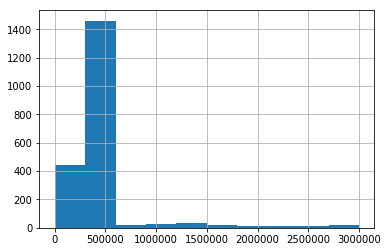

In [271]:
# land value histogram
land_value_df_2017["LAND VALUE 1"][(land_value_df_2017["SUBURB NAME"] == "MARSDEN PARK")].hist(range=(0, 3000000))




## NSW ANALYSIS


In [373]:
# founding of new suburbs

suburbs_list_2017 = land_value_df_2017["SUBURB NAME"].unique()
suburbs_list_2018 = land_value_df_2018["SUBURB NAME"].unique()
suburbs_list_2019 = land_value_df_2019["SUBURB NAME"].unique()

# 2017-2018
print("2017-2018",np.setdiff1d(suburbs_list_2018,suburbs_list_2017))

# 2018-2019
print("2018-2019",np.setdiff1d(suburbs_list_2019,suburbs_list_2018))


2017-2018 ['DIAMOND HEAD' 'FERNANCES CROSSING' 'MOUNT TENANDRA' 'MURRAYS RUN'
 'PERISHER VALLEY']
2018-2019 ['BONDI FOREST' 'MAGOMETON' 'NORTH KELLYVILLE' 'NORWEST']


In [419]:
suburb_land_value_sum_2017 = land_value_df_2017.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("2017")
suburb_land_value_sum_2018 = land_value_df_2018.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("2018")
suburb_land_value_sum_2019 = land_value_df_2019.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("2019")
suburb_land_value_sum_df = pd.concat([suburb_land_value_sum_2017,
                                      suburb_land_value_sum_2018,
                                      suburb_land_value_sum_2019], axis=1, sort=True).reset_index()
suburb_land_value_sum_df 

,index,2017,2018,2019
0,AARONS PASS,1.237700e+07,1.061200e+07,1.215645e+07
1,ABBOTSBURY,8.152150e+08,9.379175e+08,9.601578e+08
2,ABBOTSFORD,1.928436e+09,2.202873e+09,2.364153e+09
3,ABERCROMBIE,6.978828e+07,7.749295e+07,7.911605e+07
4,ABERCROMBIE RIVER,7.346340e+06,7.509140e+06,1.025538e+07
5,ABERDARE,1.229398e+08,1.321651e+08,1.460717e+08
6,ABERDEEN,1.315889e+08,1.273999e+08,1.332138e+08
7,ABERFOYLE,9.005222e+07,9.543933e+07,1.108217e+08
8,ABERGLASSLYN,3.607316e+08,3.802508e+08,4.211802e+08
9,ABERMAIN,1.529106e+08,1.679123e+08,1.867752e+08


### NULL/NOT NULL PROPERTY NAME ANALYSIS

In [392]:
# investigating property name column

# sorted(land_value_df_2019["PROPERTY NAME"][~land_value_df_2019["PROPERTY NAME"].isnull()].unique())

# max_null = land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()].max()
# land_value_df_2019[:][land_value_df_2019["LAND VALUE 1"] == max_null]

null_land_value_list = sorted(land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()])
land_value_df_2019[:][land_value_df_2019["LAND VALUE 1"].isin(null_land_value_list)].sort_values(by=["LAND VALUE 1"], ascending=False)

# land_value_df_2019["LAND VALUE 1"][~land_value_df_2019["PROPERTY NAME"].isnull()].hist()

# land_value_df_2019[:][land_value_df_2019["PROPERTY NAME"].isnull() & (land_value_df_2019["LAND VALUE 1"] < 100)].sort_values(by="LAND VALUE 1", ascending=False)

,Unnamed: 0,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,PROPERTY DESCRIPTION,ZONE CODE,AREA,AREA TYPE,BASE DATE 1,LAND VALUE 1,AUTHORITY 1,BASIS 1,BASE DATE 2,LAND VALUE 2,AUTHORITY 2,BASIS 2,BASE DATE 3,LAND VALUE 3,AUTHORITY 3,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34,SOURCE CSV FILENAME,SOURCE ZIP FILENAME
2599189,27552,708,CITY OF SYDNEY,3819161,NORMAL,NaN,NaN,188,PITT ST,SYDNEY,2000.0,1/1182754,B8,1.186,H,01/07/2018,306000000.0,14A(1),14G,01/07/2017,272000000.0,14A(1),14G,01/07/2016,243000000.0,14A(1),14G,01/07/2015,225000000.0,14A(1),14G,01/07/2014,208000000.0,27,14G,NaN,708_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
346811,5101,81,THE HILLS SHIRE,4201444,NORMAL,NaN,NaN,4-10,CELEBRATION DR,BELLA VISTA,2153.0,"101/1084481 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",B7,21.946,H,01/07/2018,250000000.0,14A(2),6A(1),01/07/2017,NaN,NaN,NaN,01/07/2016,200000000.0,14A(2),6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,081_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
2594104,22467,708,CITY OF SYDNEY,3169836,NORMAL,NaN,NaN,50,BRIDGE ST,SYDNEY,2000.0,2/1073376,B8,5838.000,M,01/07/2018,246000000.0,14A(1),6A(2),01/07/2017,196875000.0,14A(1),6A(2),01/07/2016,165000000.0,14A(1),6A(2),01/07/2015,151000000.0,14A(1),6A(2),01/07/2014,137000000.0,14A(1),6A(2),NaN,708_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
2593732,22095,708,CITY OF SYDNEY,4040113,NORMAL,NaN,NaN,1,ALFRED ST,SYDNEY,2000.0,8/1224258,B8,4041.000,M,01/07/2018,245000000.0,14A(1),6A(1),01/07/2017,195000000.0,14A(1),6A(1),01/07/2016,178000000.0,14A(2),6A(1),01/07/2015,135000000.0,14A(2),6A(1),01/07/2014,NaN,NaN,NaN,NaN,708_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
526875,25985,90,RYDE,3989413,NORMAL,NaN,NaN,112,TALAVERA RD,MACQUARIE PARK,2113.0,422/1221081,B4,1.953,H,01/07/2018,230000000.0,14A(1),6A(1),01/07/2017,222700000.0,14A(1),6A(1),01/07/2016,70000000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,090_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
2594707,23070,708,CITY OF SYDNEY,3716196,NORMAL,NaN,NaN,1,FARRER PL,SYDNEY,2000.0,104/836610,B8,3.067,H,01/07/2018,225319854.0,14A(1),6A(2)/26A,01/07/2017,182401811.0,14A(1),6A(2)/26A,01/07/2016,165505228.0,14A(1),6A(2)/26A,01/07/2015,150786851.0,14A(1),6A(2)/26A,01/07/2014,131350892.0,14A(1),6A(2)/26A,NaN,708_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1186170,56094,214,BLACKTOWN,4106580,NORMAL,NaN,NaN,NaN,RICHMOND RD,MARSDEN PARK,2765.0,3/1230408,R2,93.280,H,01/07/2018,224000000.0,14A(1),6A(1),01/07/2017,185000000.0,27B,6A(1),01/07/2016,160000000.0,27B,6A(1),01/07/2015,NaN,NaN,NaN,01/07/2014,NaN,NaN,NaN,NaN,214_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
2002562,48160,261,CUMBERLAND,3623946,NORMAL,NaN,NaN,14-54,DENNISTOUN AVE,YENNORA,2161.0,21/1171076,IN1,70.033,H,01/07/2018,186000000.0,14A(1),6A(1),01/07/2017,95300000.0,14A(1),6A(1),01/07/2016,86100000.0,14A(1),6A(1),01/07/2015,83800000.0,14A(1),6A(1),01/07/2014,79500000.0,14A(1),6A(1),NaN,261_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
1954225,48212,260,CITY OF PARRAMATTA,3956735,NORMAL,NaN,NaN,15,CARTER ST,LIDCOMBE,2141.0,12/1217641,R4,4.569,H,01/07/2018,173000000.0,14A(1),6A(1),01/07/2017,175000000.0,14A(1),6A(1),01/07/2016,17200000.0,14A(1),6A(1),01/07/2015,14000000.0,27B,6A(1),01/07/2014,NaN,NaN,NaN,NaN,260_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv
393882,52172,81,THE HILLS SHIRE,3845503,NORMAL,NaN,NaN,NaN,OLD WINDSOR RD,KELLYVILLE,2155.0,"11/1063682 1/1066762 102, 104/1122070 1, 2, 3,...",B2,17.530,H,01/07/2018,166000000.0,14A(1),6A(1),01/07/2017,150000000.0,14A(2),6A(1),01/07/2016,142000000.0,14A(2),6A(1),01/07/2015,21800000.0,14A(1),6A(1),01/07/2014,21760000.0,14A(2),6A(1),NaN,081_LAND_VALUE_DATA_20190701.csv,708_LAND_VALUE_DATA_20190601.csv


In [381]:
# quantile range
null_property_name_series = land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()]
not_null_property_name_series = land_value_df_2019["LAND VALUE 1"][~land_value_df_2019["PROPERTY NAME"].isnull()]

print(null_property_name_series.quantile([0, 0.25, 0.5, 0.75, 1]))
print(not_null_property_name_series.quantile([0, 0.25, 0.5, 0.75, 1]))

0.00            1.0
0.25       224000.0
0.50       418000.0
0.75       787000.0
1.00    306000000.0
Name: LAND VALUE 1, dtype: float64
0.00            1.0
0.25       131000.0
0.50       382000.0
0.75      1070000.0
1.00    608000000.0
Name: LAND VALUE 1, dtype: float64


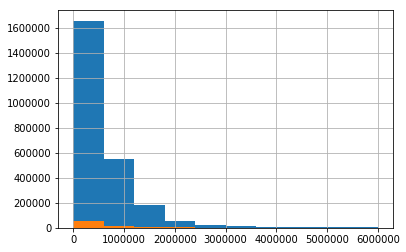

In [389]:
# histograms
null_property_name_series.hist(range=(0, 6000000))
not_null_property_name_series.hist(range=(0, 6000000))






# CRIME DATA

In [47]:
# getting crime data
crime_suburb_data_filepath = Path("data/SuburbData2018.csv")
crime_suburb_data = pd.read_csv(crime_suburb_data_filepath)

In [6]:
# sampling data
# crime_suburb_data.sample(10)

In [48]:
# types of offences
unique_offence_categories = crime_suburb_data["Offence category"].unique()
# pd.Series(unique_offence_categories)

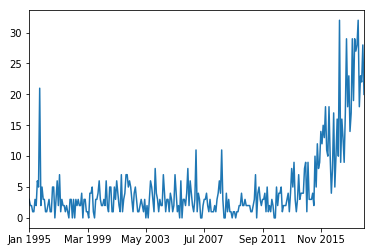

In [65]:
# filter suburb and offence category then plot
marsdenpark_data = crime_suburb_data[:][(crime_suburb_data["Suburb"] == "Marsden Park") &
                                        (crime_suburb_data["Offence category"] == "Theft")]
total_crimes_timeseries = marsdenpark_data.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
total_crimes_timeseries.plot()